In [234]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from scipy import stats
%matplotlib inline

In [235]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

vehicle = pd.read_csv("vehicle.csv")

In [236]:
vehicle.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [237]:
vehicle.shape

(846, 19)

In [238]:
vehicle=vehicle.convert_objects(convert_numeric=True)

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [239]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [240]:
from sklearn.preprocessing import LabelEncoder
vehicle['classnew'] = LabelEncoder().fit_transform(vehicle['class'])
vehicle = vehicle.drop('class', axis=1)

In [241]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
classnew                         int64
dtype: object

In [242]:
vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
classnew                     846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
classnew                       1.0    1.0     2.0

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [243]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
vehicle = vehicle.replace('?', np.nan)
#cancer_df.dropna()
vehicle.fillna(vehicle.mean(), inplace=True)


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [244]:
# Check for correlation of variable
vehicle.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
classnew                       -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
classnew                        -0.182270             -0.098318   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                            

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


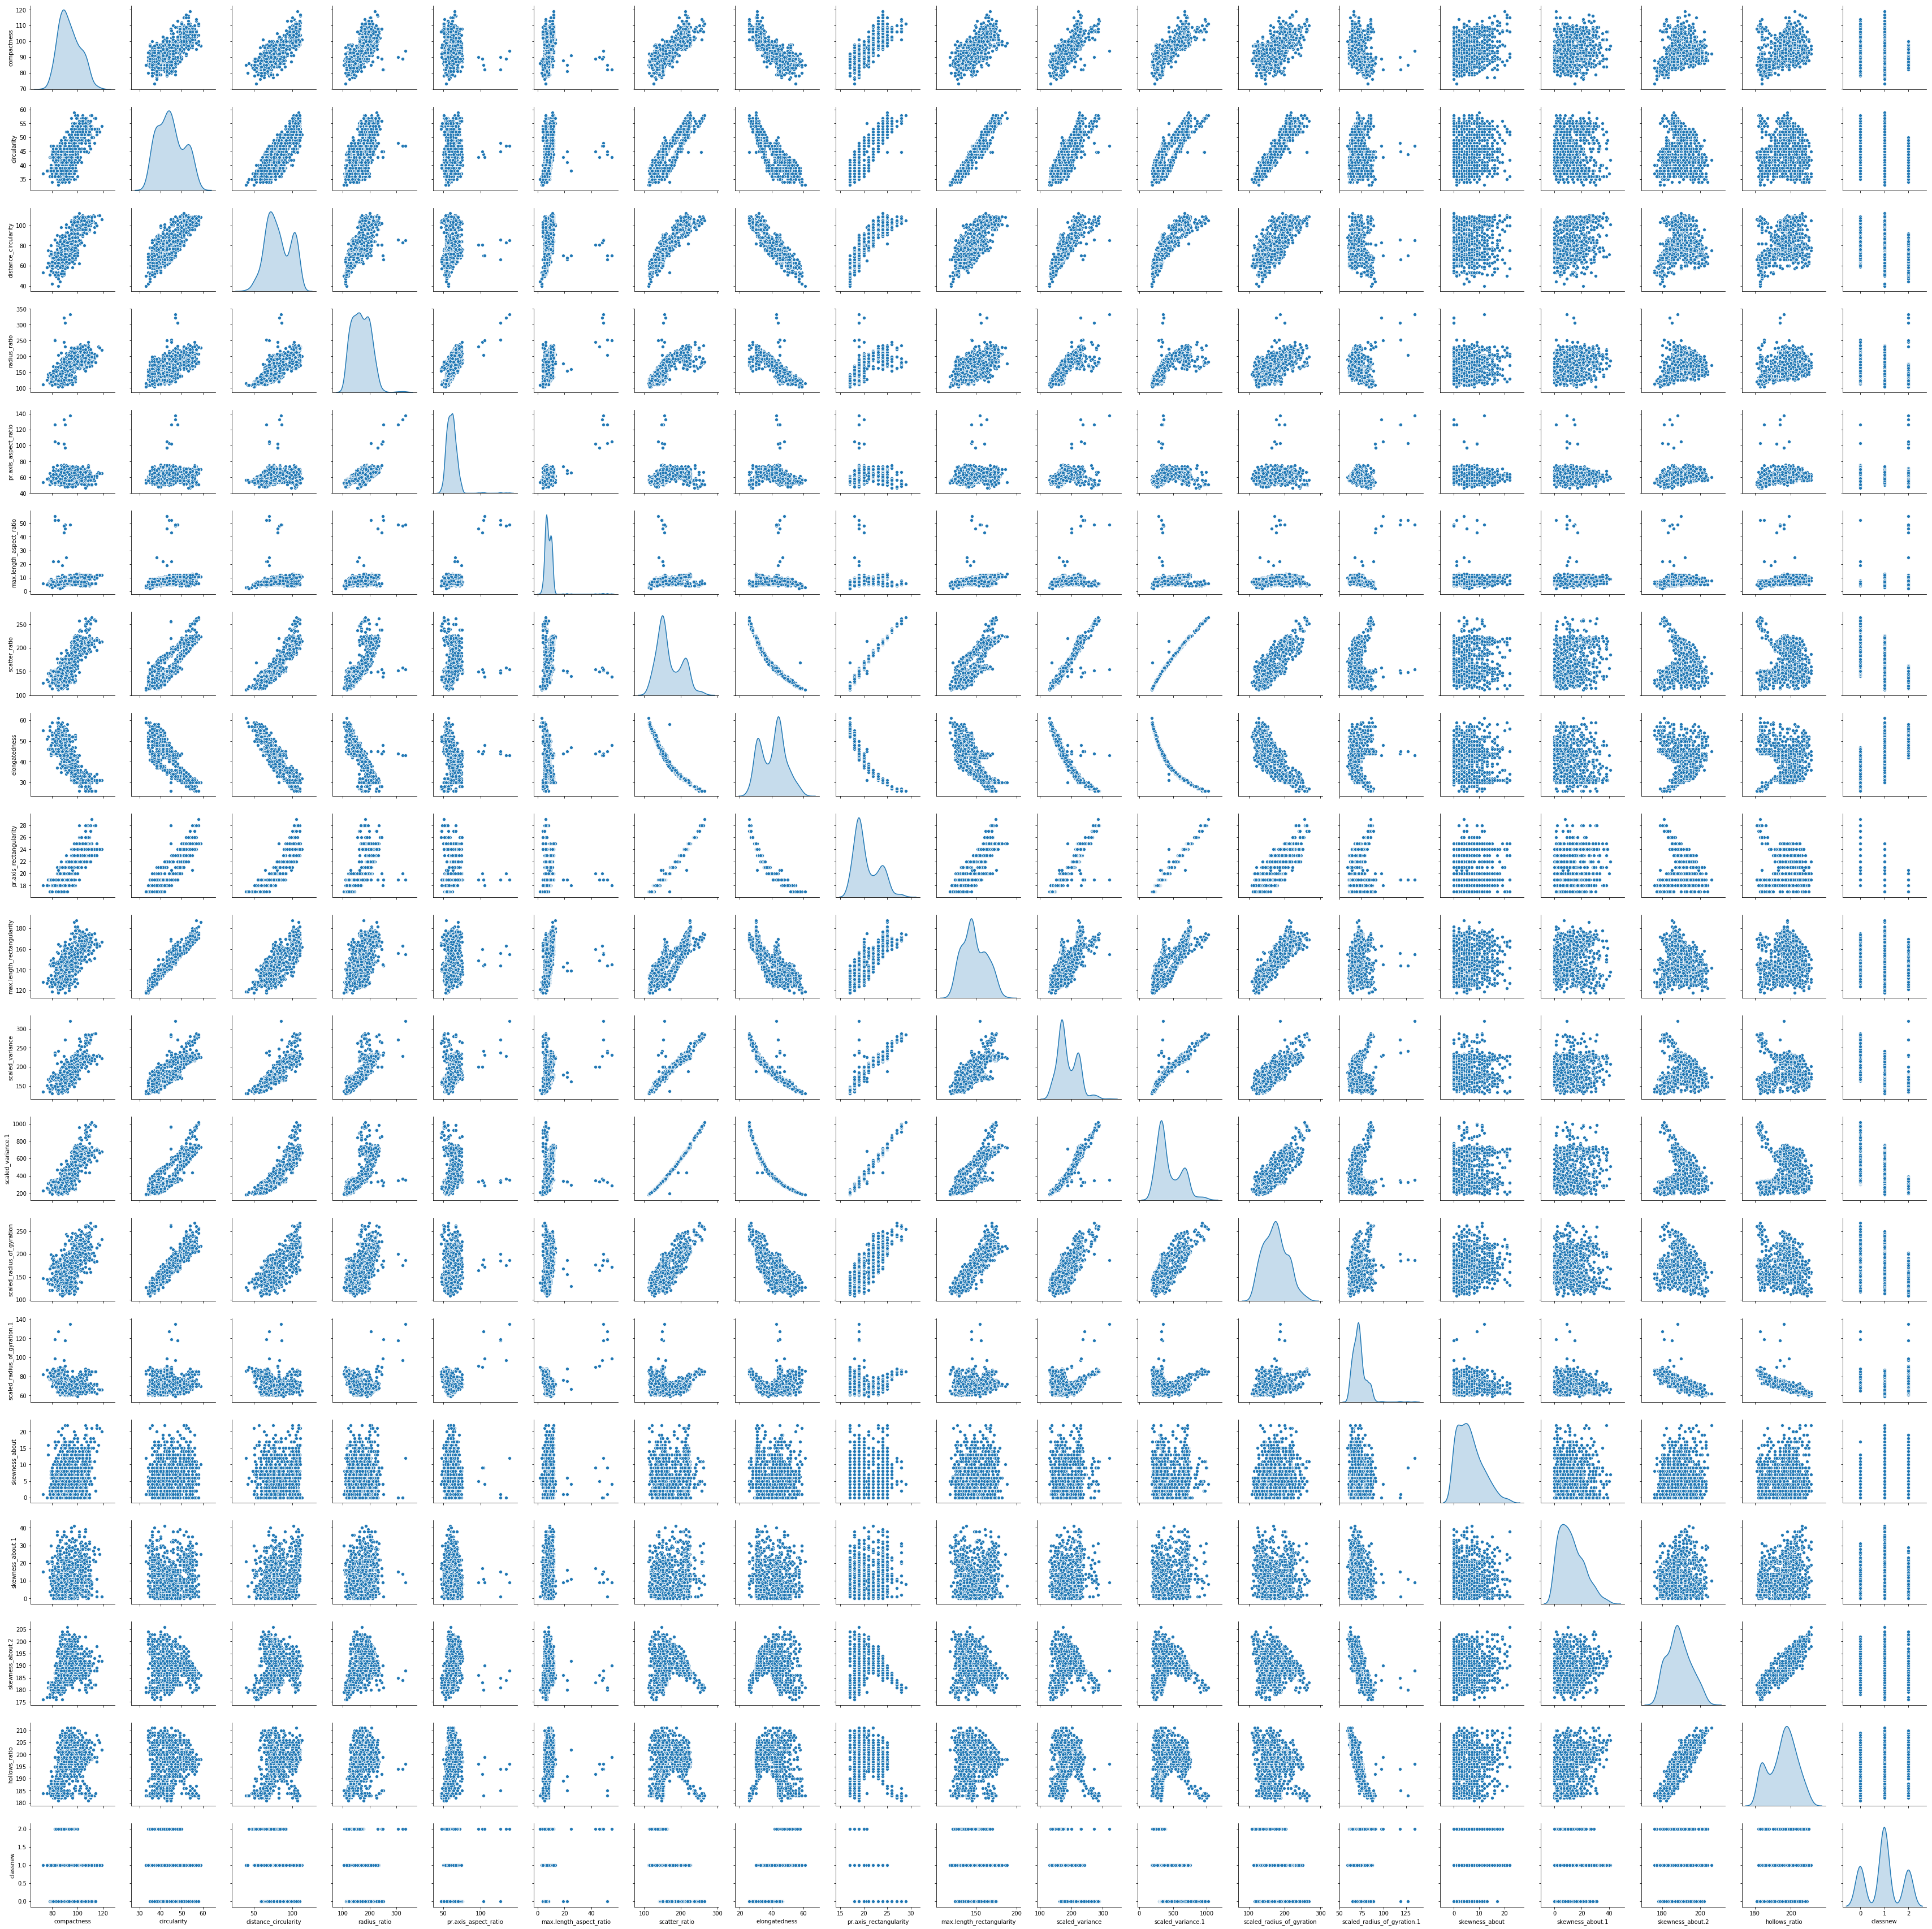

In [245]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
import seaborn as sns
sns.pairplot(vehicle , diag_kind = "kde")

In [246]:
#Let us check for pair plots
print('From the pair plots , 3 clusters are visible')

From the pair plots , 3 clusters are visible


In [247]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
print('there is direct co-relation between circularity and max.length_rectangularity. So we can drop max.length_rectangularity feature')


there is direct co-relation between circularity and max.length_rectangularity. So we can drop max.length_rectangularity feature


In [248]:
print('There is direct co-relation between scaled_variance.1,scaled_variance, scatter_ratio,pr.axis_rectangularity,elongatedness')
print('So we can drop the feature like scaled_variance.1, pr.axis_rectangularity,elongatedness')

There is direct co-relation between scaled_variance.1,scaled_variance, scatter_ratio,pr.axis_rectangularity,elongatedness
So we can drop the feature like scaled_variance.1, pr.axis_rectangularity,elongatedness


In [249]:
vehicle = vehicle.drop('max.length_rectangularity', axis=1)
vehicle = vehicle.drop('scaled_variance.1', axis=1)
vehicle = vehicle.drop('pr.axis_rectangularity', axis=1)
vehicle = vehicle.drop('elongatedness', axis=1)

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

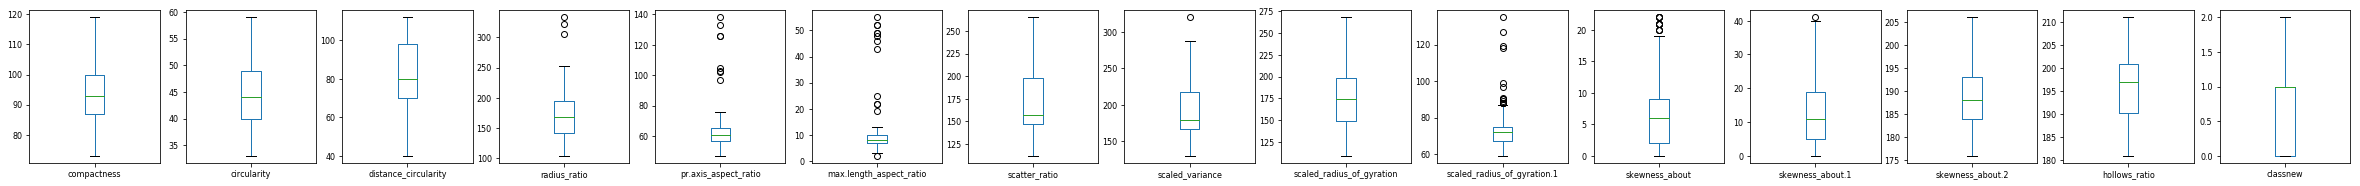

In [250]:
from matplotlib import pyplot
vehicle.plot(kind='box', subplots=True, layout=(18,18), fontsize=8, figsize=(50,60))
pyplot.show()

In [251]:
vehicle.shape

(846, 15)

In [252]:
vehicle = vehicle[(np.abs(stats.zscore(vehicle)) <  1.96 ).all(axis=1)]

In [253]:
vehicle.shape

(656, 15)

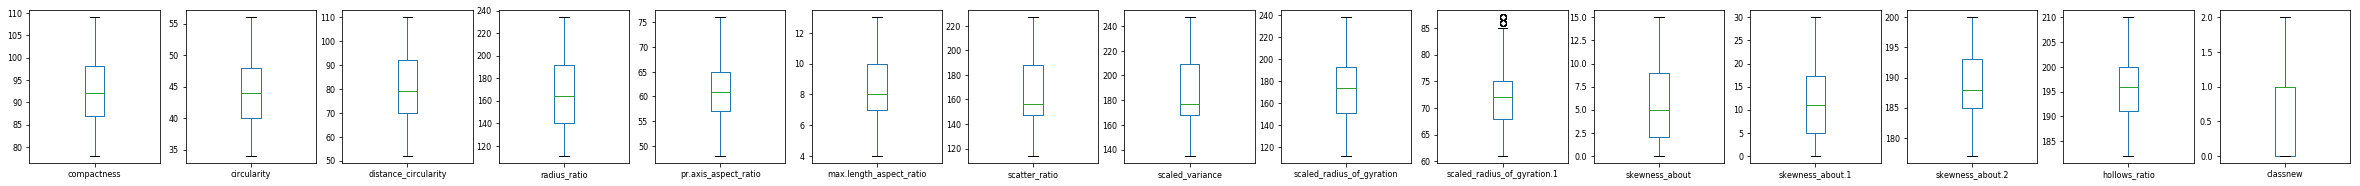

In [254]:
vehicle.plot(kind='box', subplots=True, layout=(18,18), fontsize=8, figsize=(50,60))
pyplot.show()

In [255]:
vehicle.describe()


compactness  circularity  distance_circularity  radius_ratio  \
count   656.000000   656.000000            656.000000    656.000000   
mean     92.818598    44.581534             81.256603    166.282854   
std       7.465689     5.599238             14.355226     30.781448   
min      78.000000    34.000000             52.000000    111.000000   
25%      87.000000    40.000000             70.000000    139.750000   
50%      92.000000    44.000000             79.000000    164.000000   
75%      98.000000    48.000000             92.000000    192.000000   
max     109.000000    56.000000            110.000000    234.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            656.000000               656.000000     656.000000   
mean              61.412131                 8.166159     166.207167   
std                5.570437                 1.962585      29.170812   
min               48.000000                 4.000000     114.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     156.000000   
75%               65.000000                10.000000     188.000000   
max               76.000000                13.000000     227.000000   

       scaled_variance  scaled_radius_of_gyration  \
count       656.000000                 656.000000   
mean        185.506497                 172.935091   
std          25.992867                  28.691065   
min         135.000000                 112.000000   
25%         168.000000                 151.000000   
50%         177.000000                 173.500000   
75%         209.250000                 193.000000   
max         247.000000                 238.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   656.000000      656.000000        656.000000   
mean                     72.085047        5.692356         11.721955   
std                       5.618135        4.118977          7.874458   
min                      61.000000        0.000000          0.000000   
25%                      68.000000        2.000000          5.000000   
50%                      72.000000        5.000000         11.000000   
75%                      75.000000        9.000000         17.250000   
max                      87.000000       15.000000         30.000000   

       skewness_about.2  hollows_ratio    classnew  
count        656.000000     656.000000  656.000000  
mean         188.664511     195.346037    0.975610  
std            5.610265       6.646867    0.717938  
min          177.000000     182.000000    0.000000  
25%          185.000000     191.000000    0.000000  
50%          188.000000     196.000000    1.000000  
75%          193.000000     200.000000    1.000000  
max          200.000000     210.000000    2.000000

# Q6 Create a covariance matrix for identifying Principal components

In [256]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split

X = vehicle.drop('classnew', axis=1)
y = vehicle["classnew"]
#from sklearn.preprocessing import StandardScaler

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


In [257]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test_O)

In [258]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00218341  0.61792509  0.77098141  0.7535363   0.24102017  0.54161694
   0.78797537  0.76961899  0.47997808 -0.40080565  0.18759468  0.1524509
   0.4308195   0.51018976]
 [ 0.61792509  1.00218341  0.74165086  0.58466603  0.20474837  0.57263237
   0.80983408  0.76893322  0.93367229  0.01572423  0.15511618 -0.01530688
  -0.05627282  0.11497552]
 [ 0.77098141  0.74165086  1.00218341  0.78527141  0.25171622  0.71069117
   0.89897114  0.88571606  0.63977943 -0.34180571  0.093439    0.25700424
   0.21117516  0.42766086]
 [ 0.7535363   0.58466603  0.78527141  1.00218341  0.69116035  0.40577735
   0.80503591  0.83301917  0.50228608 -0.47741773  0.02792756  0.16284243
   0.51942276  0.58475504]
 [ 0.24102017  0.20474837  0.25171622  0.69116035  1.00218341  0.03320895
   0.25972957  0.29892251  0.18809826 -0.30217692 -0.06964363 -0.04139962
   0.44335719  0.42762885]
 [ 0.54161694  0.57263237  0.71069117  0.40577735  0.03320895  1.00218341
   0.57093648  0.49896302  0.4

In [259]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 46.58053879  67.45290837  76.35419877  84.30527327  90.08273146
  93.9656125   96.33601708  97.86510672  98.64675311  99.12844146
  99.48043413  99.75115022  99.88592253 100.        ]


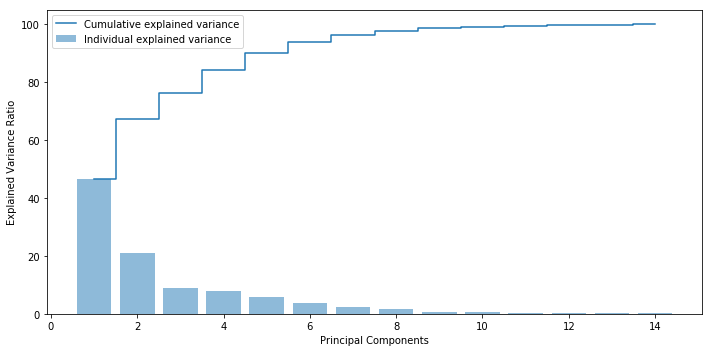

In [260]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q7 Identify eigen values and eigen vector

In [261]:
# Step 2- Get eigen values and eigen vector

In [262]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:7]

[(6.535514023160412,
  array([ 0.33850867,  0.30700632,  0.36352144,  0.3557095 ,  0.17160762,
          0.25676621,  0.35815414,  0.35413627,  0.26411393, -0.17281255,
          0.0524023 ,  0.07993802,  0.15820177,  0.22278406])),
 (2.9285119417011347,
  array([-0.03066168,  0.28786276,  0.08122361, -0.10996768, -0.20756016,
          0.08515659,  0.17282879,  0.15374743,  0.34624267,  0.47017039,
          0.03406425, -0.05363565, -0.4967833 , -0.44932039])),
 (1.2489015744401657,
  array([-0.08823567,  0.11046079, -0.14992388,  0.21975634,  0.56460766,
         -0.37164858, -0.02515332,  0.02930811,  0.19362956,  0.13414212,
         -0.1135746 , -0.60542992,  0.09330092, -0.08491507])),
 (1.1155808893100678,
  array([ 0.11082406,  0.11309497, -0.05159579, -0.14800438, -0.2097309 ,
          0.07282883, -0.10515936, -0.13702486,  0.13665148, -0.11498776,
          0.80847146, -0.40708769,  0.11264249,  0.08546405])),
 (0.8106101820010352,
  array([ 0.00081277, -0.11385948, -0.07095

# Q8 Find variance and cumulative variance by each eigen vector

In [263]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(e_vals[index], e_vecs[:,index]) for index in range(len(e_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(e_vals))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(e_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(6.535514023160412, array([ 0.33850867,  0.30700632,  0.36352144,  0.3557095 ,  0.17160762,
        0.25676621,  0.35815414,  0.35413627,  0.26411393, -0.17281255,
        0.0524023 ,  0.07993802,  0.15820177,  0.22278406])), (2.9285119417011347, array([-0.03066168,  0.28786276,  0.08122361, -0.10996768, -0.20756016,
        0.08515659,  0.17282879,  0.15374743,  0.34624267,  0.47017039,
        0.03406425, -0.05363565, -0.4967833 , -0.44932039])), (1.2489015744401657, array([-0.08823567,  0.11046079, -0.14992388,  0.21975634,  0.56460766,
       -0.37164858, -0.02515332,  0.02930811,  0.19362956,  0.13414212,
       -0.1135746 , -0.60542992,  0.09330092, -0.08491507])), (1.1155808893100678, array([ 0.11082406,  0.11309497, -0.05159579, -0.14800438, -0.2097309 ,
        0.07282883, -0.10515936, -0.13702486,  0.13665148, -0.11498776,
        0.80847146, -0.40708769,  0.11264249,  0.08546405])), (0.8106101820010352, array([ 0.00081277, -0.11385948, -0.0709559 ,  0.16874103,  0.26224943,

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [264]:
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00218341  0.61792509  0.77098141  0.7535363   0.24102017  0.54161694
   0.78797537  0.76961899  0.47997808 -0.40080565  0.18759468  0.1524509
   0.4308195   0.51018976]
 [ 0.61792509  1.00218341  0.74165086  0.58466603  0.20474837  0.57263237
   0.80983408  0.76893322  0.93367229  0.01572423  0.15511618 -0.01530688
  -0.05627282  0.11497552]
 [ 0.77098141  0.74165086  1.00218341  0.78527141  0.25171622  0.71069117
   0.89897114  0.88571606  0.63977943 -0.34180571  0.093439    0.25700424
   0.21117516  0.42766086]
 [ 0.7535363   0.58466603  0.78527141  1.00218341  0.69116035  0.40577735
   0.80503591  0.83301917  0.50228608 -0.47741773  0.02792756  0.16284243
   0.51942276  0.58475504]
 [ 0.24102017  0.20474837  0.25171622  0.69116035  1.00218341  0.03320895
   0.25972957  0.29892251  0.18809826 -0.30217692 -0.06964363 -0.04139962
   0.44335719  0.42762885]
 [ 0.54161694  0.57263237  0.71069117  0.40577735  0.03320895  1.00218341
   0.57093648  0.49896302  0.4

In [265]:
P_reduce = np.array(train_eigvectors_sorted[0:7])   # Reducing from 8 to 5 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

In [266]:
#Let us check it visually
Proj_data_df.corr()

0             1             2             3             4  \
0  1.000000e+00  2.992093e-16  1.323626e-16  2.441874e-17  4.566549e-16   
1  2.992093e-16  1.000000e+00  5.653169e-16 -9.821259e-17  4.468210e-17   
2  1.323626e-16  5.653169e-16  1.000000e+00 -1.117118e-15  9.010445e-17   
3  2.441874e-17 -9.821259e-17 -1.117118e-15  1.000000e+00  5.170228e-16   
4  4.566549e-16  4.468210e-17  9.010445e-17  5.170228e-16  1.000000e+00   
5  5.752734e-16 -1.226330e-16  1.333101e-15  3.798547e-16 -1.480254e-15   
6 -9.855366e-16 -2.136937e-17  1.455414e-15 -2.028878e-16  4.327824e-16   

              5             6  
0  5.752734e-16 -9.855366e-16  
1 -1.226330e-16 -2.136937e-17  
2  1.333101e-15  1.455414e-15  
3  3.798547e-16 -2.028878e-16  
4 -1.480254e-15  4.327824e-16  
5  1.000000e+00  1.386693e-16  
6  1.386693e-16  1.000000e+00

In [267]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y_train, test_size=test_size, random_state=seed)

In [268]:
from scipy.stats import zscore
vehicle_z = vehicle.apply(zscore)
from sklearn.cluster import KMeans

In [269]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(vehicle_z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]


num_clusters  cluster_errors  Avg Sil Score
0             2     6624.693268       0.292070
1             3     5177.657065       0.260262
2             4     4599.738454       0.241069
3             5     4226.218334       0.235086
4             6     3911.081297       0.237846
5             7     3660.591481       0.228306
6             8     3507.014943       0.212341
7             9     3352.075759       0.187093

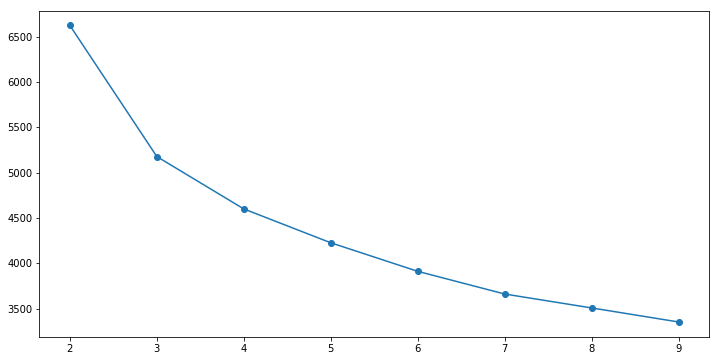

In [270]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [271]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(vehicle_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [272]:
# Get the centroids.... using function cluster_centers_
centroids = cluster.cluster_centers_
centroids

array([[-0.29784364, -0.3942548 , -0.34142434, -0.5538353 , -0.25667566,
         0.24207246, -0.69419501, -0.70260784, -0.46216891, -0.37490712,
         0.06534996, -0.18584162,  0.18689859,  0.31307449,  1.08908106],
       [-1.07452681, -0.58056812, -1.00662836, -1.13834265, -0.74420639,
        -0.80264277, -0.78355105, -0.82473844, -0.37260668,  1.25156625,
        -0.12650959, -0.21299001, -1.24867176, -1.42300303, -0.46121736],
       [ 0.01912773, -0.37146018, -0.11953664,  0.53781918,  0.7775037 ,
        -0.53872188, -0.0084353 ,  0.10892009, -0.3771474 , -0.53293819,
        -0.18688222,  0.04927557,  0.93103309,  0.62008497, -0.74840709],
       [ 1.27543439,  1.29275477,  1.38888986,  1.13041845,  0.23252733,
         0.96243141,  1.46462219,  1.40267648,  1.18301568, -0.23675275,
         0.21647536,  0.34746489,  0.06940079,  0.37807624, -0.06556866]])

In [273]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.297844    -0.394255             -0.341424     -0.553835   
1    -1.074527    -0.580568             -1.006628     -1.138343   
2     0.019128    -0.371460             -0.119537      0.537819   
3     1.275434     1.292755              1.388890      1.130418   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.256676                 0.242072      -0.694195   
1             -0.744206                -0.802643      -0.783551   
2              0.777504                -0.538722      -0.008435   
3              0.232527                 0.962431       1.464622   

   scaled_variance  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0        -0.702608                  -0.462169                    -0.374907   
1        -0.824738                  -0.372607                     1.251566   
2         0.108920                  -0.377147                    -0.532938   
3         1.402676                   1.183016                    -0.236753   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  classnew  
0        0.065350         -0.185842          0.186899       0.313074  1.089081  
1       -0.126510         -0.212990         -1.248672      -1.423003 -0.461217  
2       -0.186882          0.049276          0.931033       0.620085 -0.748407  
3        0.216475          0.347465          0.069401       0.378076 -0.065569

In [274]:
prediction=cluster.predict(vehicle_z)
vehicle_z["GROUP"] = prediction

In [275]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case
vehicle_z.groupby("GROUP").count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              181          181                   181           181   
1              152          152                   152           152   
2              155          155                   155           155   
3              168          168                   168           168   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       181                      181            181   
1                       152                      152            152   
2                       155                      155            155   
3                       168                      168            168   

       scaled_variance  scaled_radius_of_gyration  \
GROUP                                               
0                  181                        181   
1                  152                        152   
2                  155                        155   
3                  168                        168   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              181             181               181   
1                              152             152               152   
2                              155             155               155   
3                              168             168               168   

       skewness_about.2  hollows_ratio  classnew  
GROUP                                             
0                   181            181       181  
1                   152            152       152  
2                   155            155       155  
3                   168            168       168

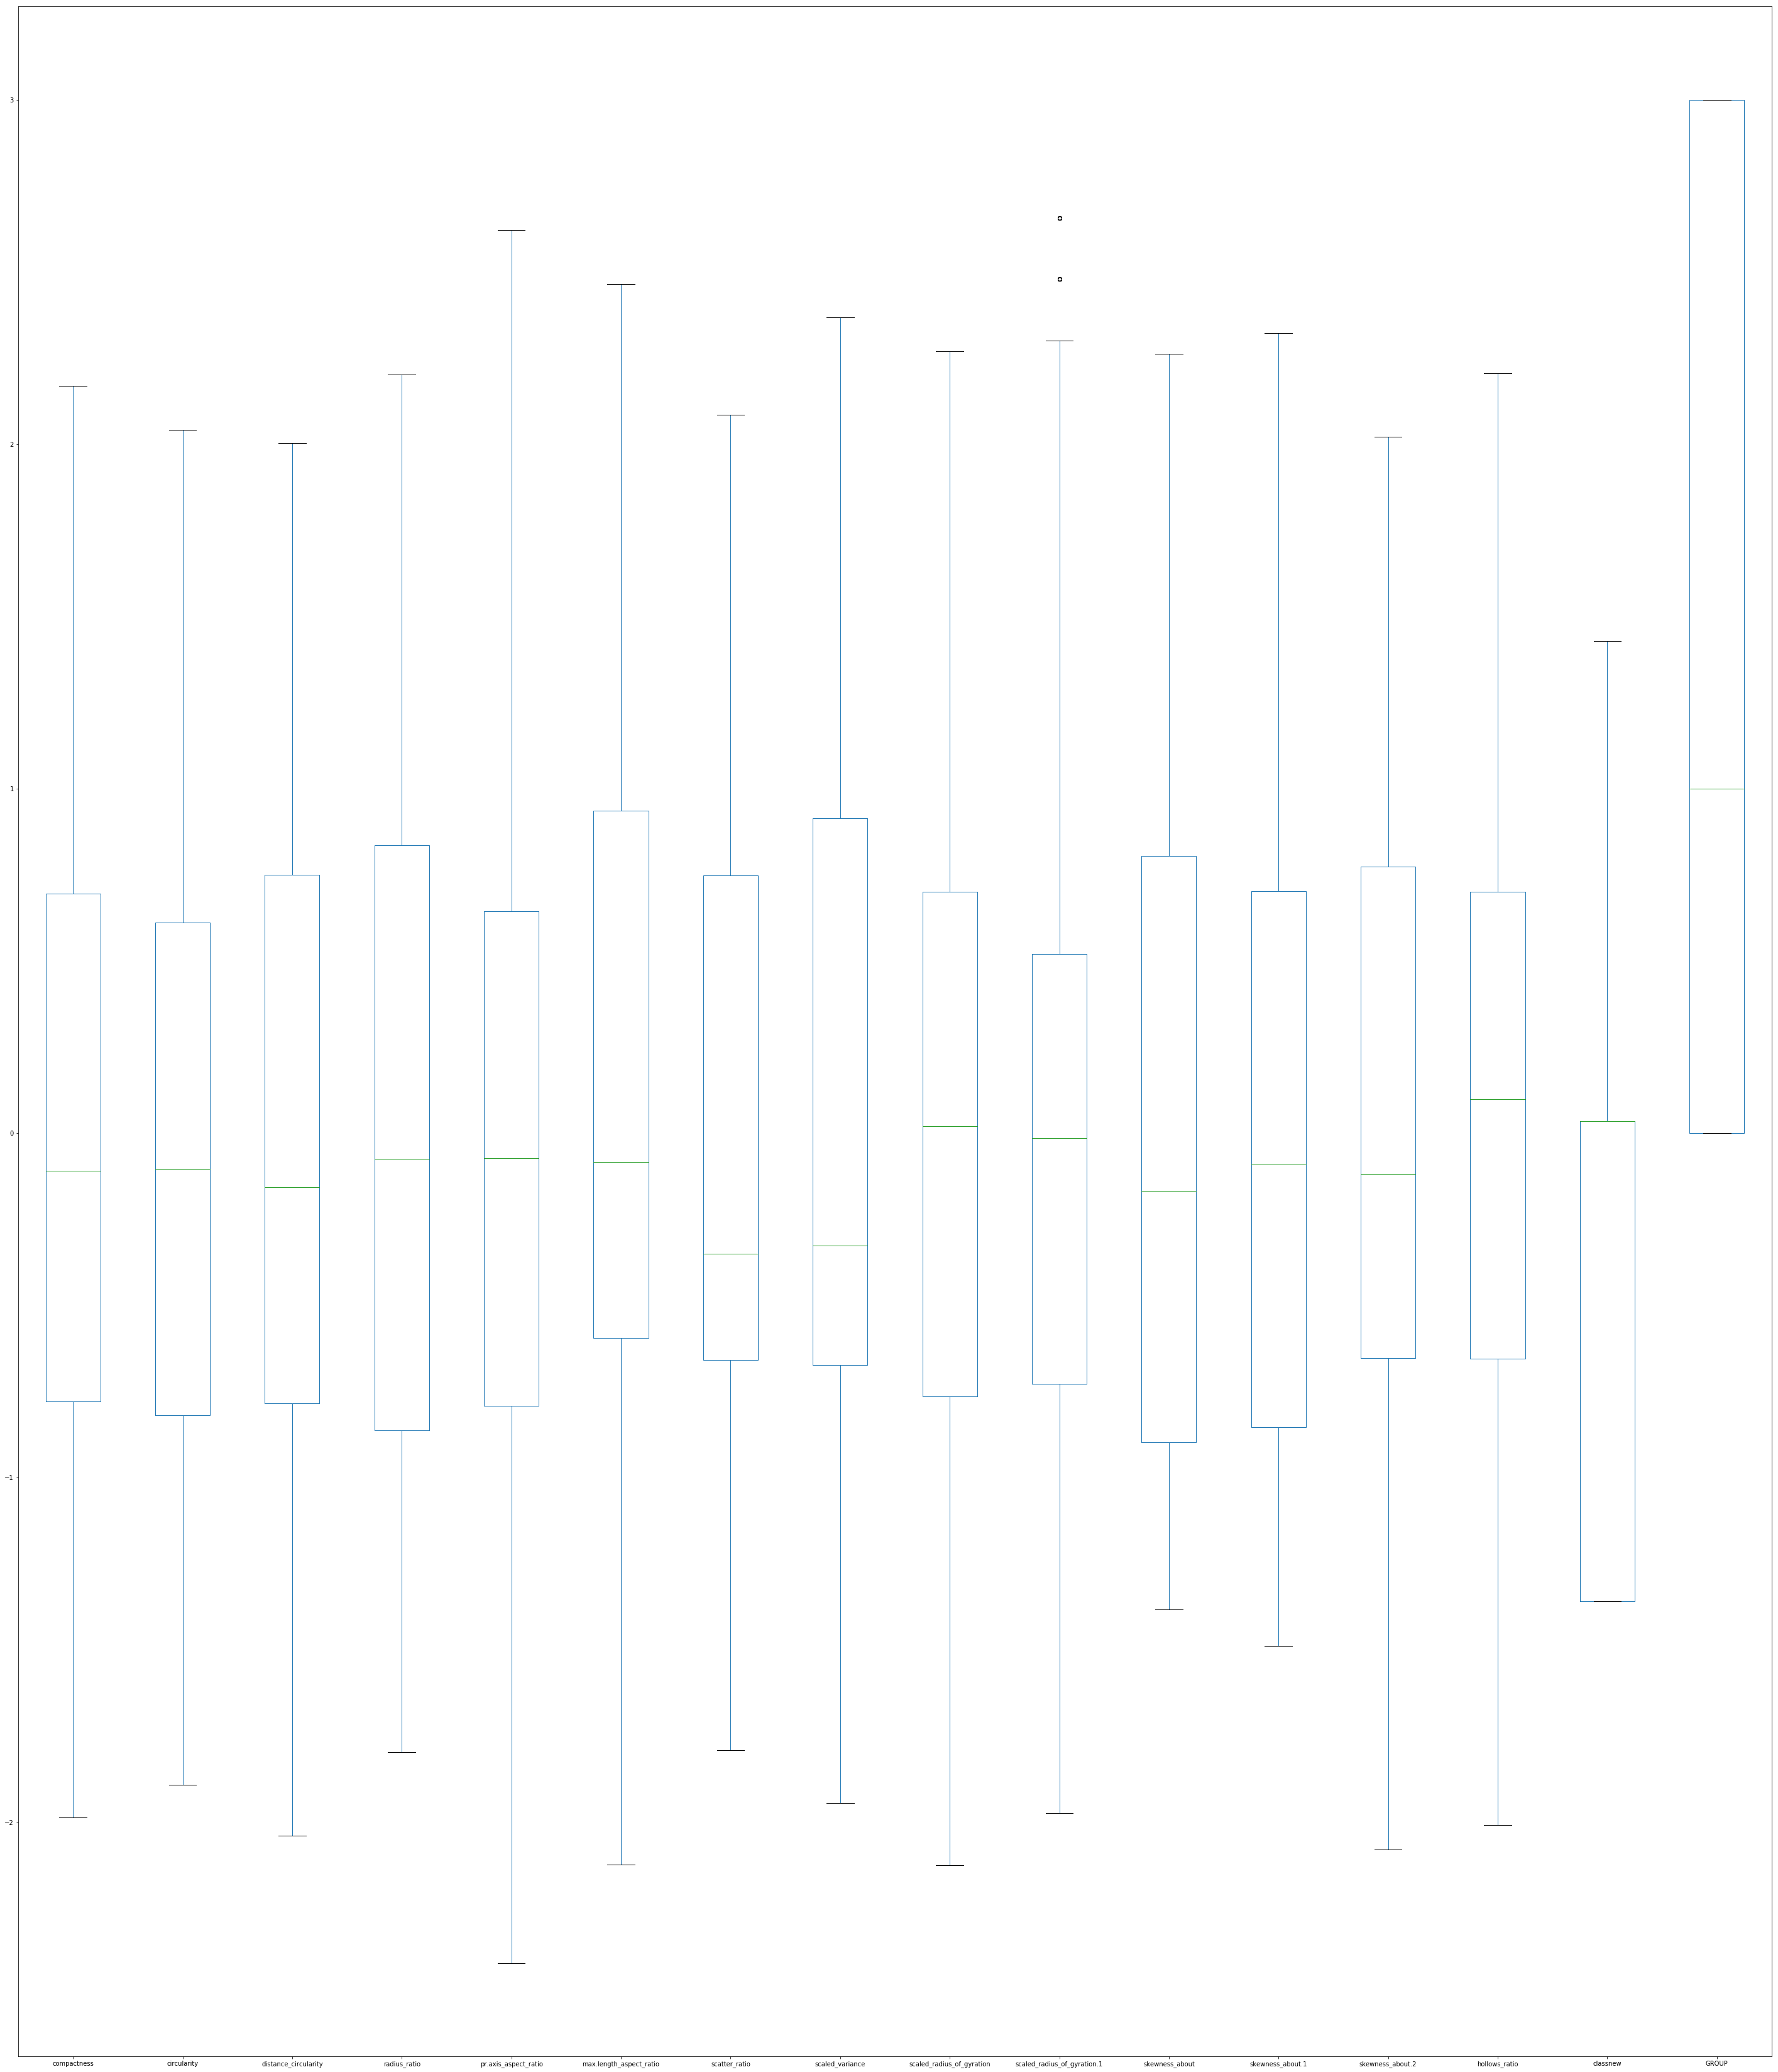

In [276]:
import matplotlib.pylab as plt
vehicle_z.plot(kind='box', by = 'GROUP', layout=(18,18), figsize=(50,60))
pyplot.show()

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


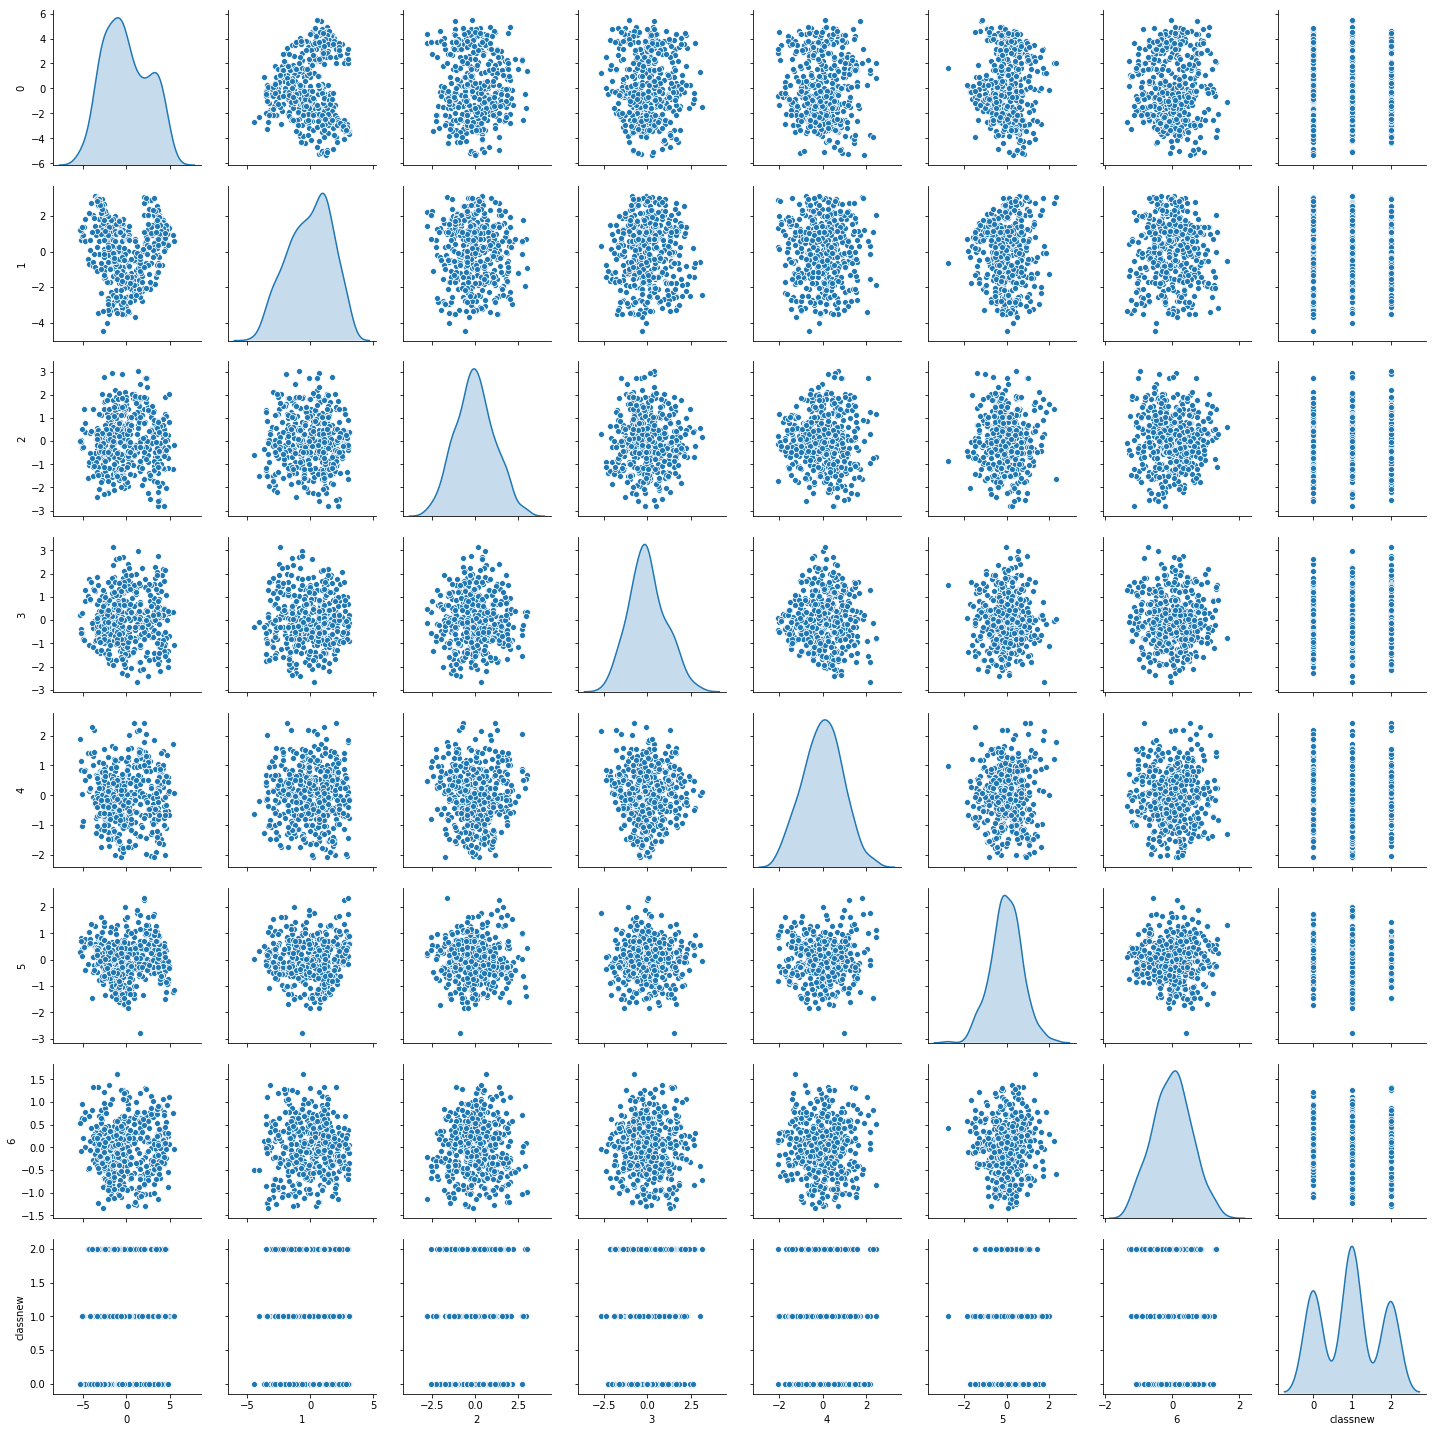

In [277]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [278]:
X_test_std =  sc.fit_transform(X_test_O) 


X_test_std_4D = np.dot(X_test_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_test_df = pd.DataFrame(X_test_std_4D)  # converting array to dataframe for pairplot


print(X_test_std.shape)
print(X_test_std_4D.shape)
print(Proj_test_df.shape)

(197, 14)
(197, 7)
(197, 7)


In [279]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [280]:
svclassifier.coef_

array([[-0.53525174,  0.1167911 ,  1.52588349, -0.45179453,  0.94815684,
         0.29010827, -0.77753136],
       [ 0.09202398,  0.54864159,  1.86810361, -0.93421263,  1.71781756,
         0.7967053 , -0.65932917],
       [ 0.52794574,  0.16985588,  0.37797782, -0.47336709,  1.45387293,
         1.64385704, -0.16714321]])

In [281]:
y_pred = svclassifier.predict(X_test)  

In [282]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[34  1  3]
 [ 8 58  2]
 [ 4  4 24]]
             precision    recall  f1-score   support

          0       0.74      0.89      0.81        38
          1       0.92      0.85      0.89        68
          2       0.83      0.75      0.79        32

avg / total       0.85      0.84      0.84       138



In [283]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [284]:
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[36  0  2]
 [ 0 64  4]
 [ 0  5 27]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.93      0.94      0.93        68
          2       0.82      0.84      0.83        32

avg / total       0.92      0.92      0.92       138



In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats.stats import pearsonr


In [286]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(0.01, 0.05, 0.5, 1),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)
print("accuracy:"+str(np.average(cross_val_score(clf, X_train, y_train, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(clf, X_train, y_train, scoring='f1_micro'))))
print("f1:"+str(clf.best_params_))

accuracy:0.8657154332961069
f1:0.8657154332961069
f1:{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}


In [287]:
print('Best hyperparameters are C=1 and Kernel= rbf')
print('Best accuracy score is 86.5%')

Best hyperparameters are C=1 and Kernel= rbf
Best accuracy score is 86.5%
